# Credit Card Fraud Detection Using Machine Learning
## Introduction

Detecting credit card fraud is a tricky task for two main reasons. First, there are very few fraudulent transactions compared to the huge number of normal ones. This imbalance makes it hard to train a model because it gets used to seeing only the normal transactions. Second, the data we use doesn't have real labels; instead, features are labeled as V1, V2, and so on, to protect customer privacy.

This notebook will show how to spot fraudulent transactions using machine learning. We'll start by training models on our imbalanced dataset to see the challenges firsthand. Then, we'll apply techniques to balance the data and compare the results to see how much better our models perform.

## Table of Contents

1. [Introduction](#Introduction)
2. [Importing Libraries](#Importing-Libraries)
3. [Loading the Data](#Loading-the-Data)
4. [Exploratory Data Analysis & Data Preprocessing](#Exploratory-Data-Analysis-&-Data-Preprocessing)
5. [Feature Scaling & Data Splitting](#Feature-Scaling-&-Data-Splitting)
6. [Model Selection (Training & Evaluation)](#Model-Selection-(Training-&-Evaluation))
7. [Conclusion](#Conclusion)

## Importing Libraries

This first import is used to ignore the warnings shown by the notebook, if you wish not to see them run the cell below. :)

In [38]:
# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score,
                             roc_auc_score, roc_curve, precision_recall_curve)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC

# Neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

# Handling imbalanced data
from imblearn.over_sampling import SMOTE

# Display settings
%matplotlib inline
sns.set(style='whitegrid', palette='muted')

## Loading the Data

I downloaded the data from <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">Kaggle</a>. A relatively large dataset with a lot of (PCA encoded) features.

In [2]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Exploratory Data Analysis & Data Preprocessing

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Good, so we don't have to worry about filling/discarding records, since there is no missing data.

In [4]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
492/284807

0.001727485630620034

 - 0 = not fraud
 - 1 = fraud

Only 0.001727% is fradulant activity.

Since features V1-V28 are already PCA transformed (they are already scaled to range from -3 to 3), we only need to scale time and amount features.

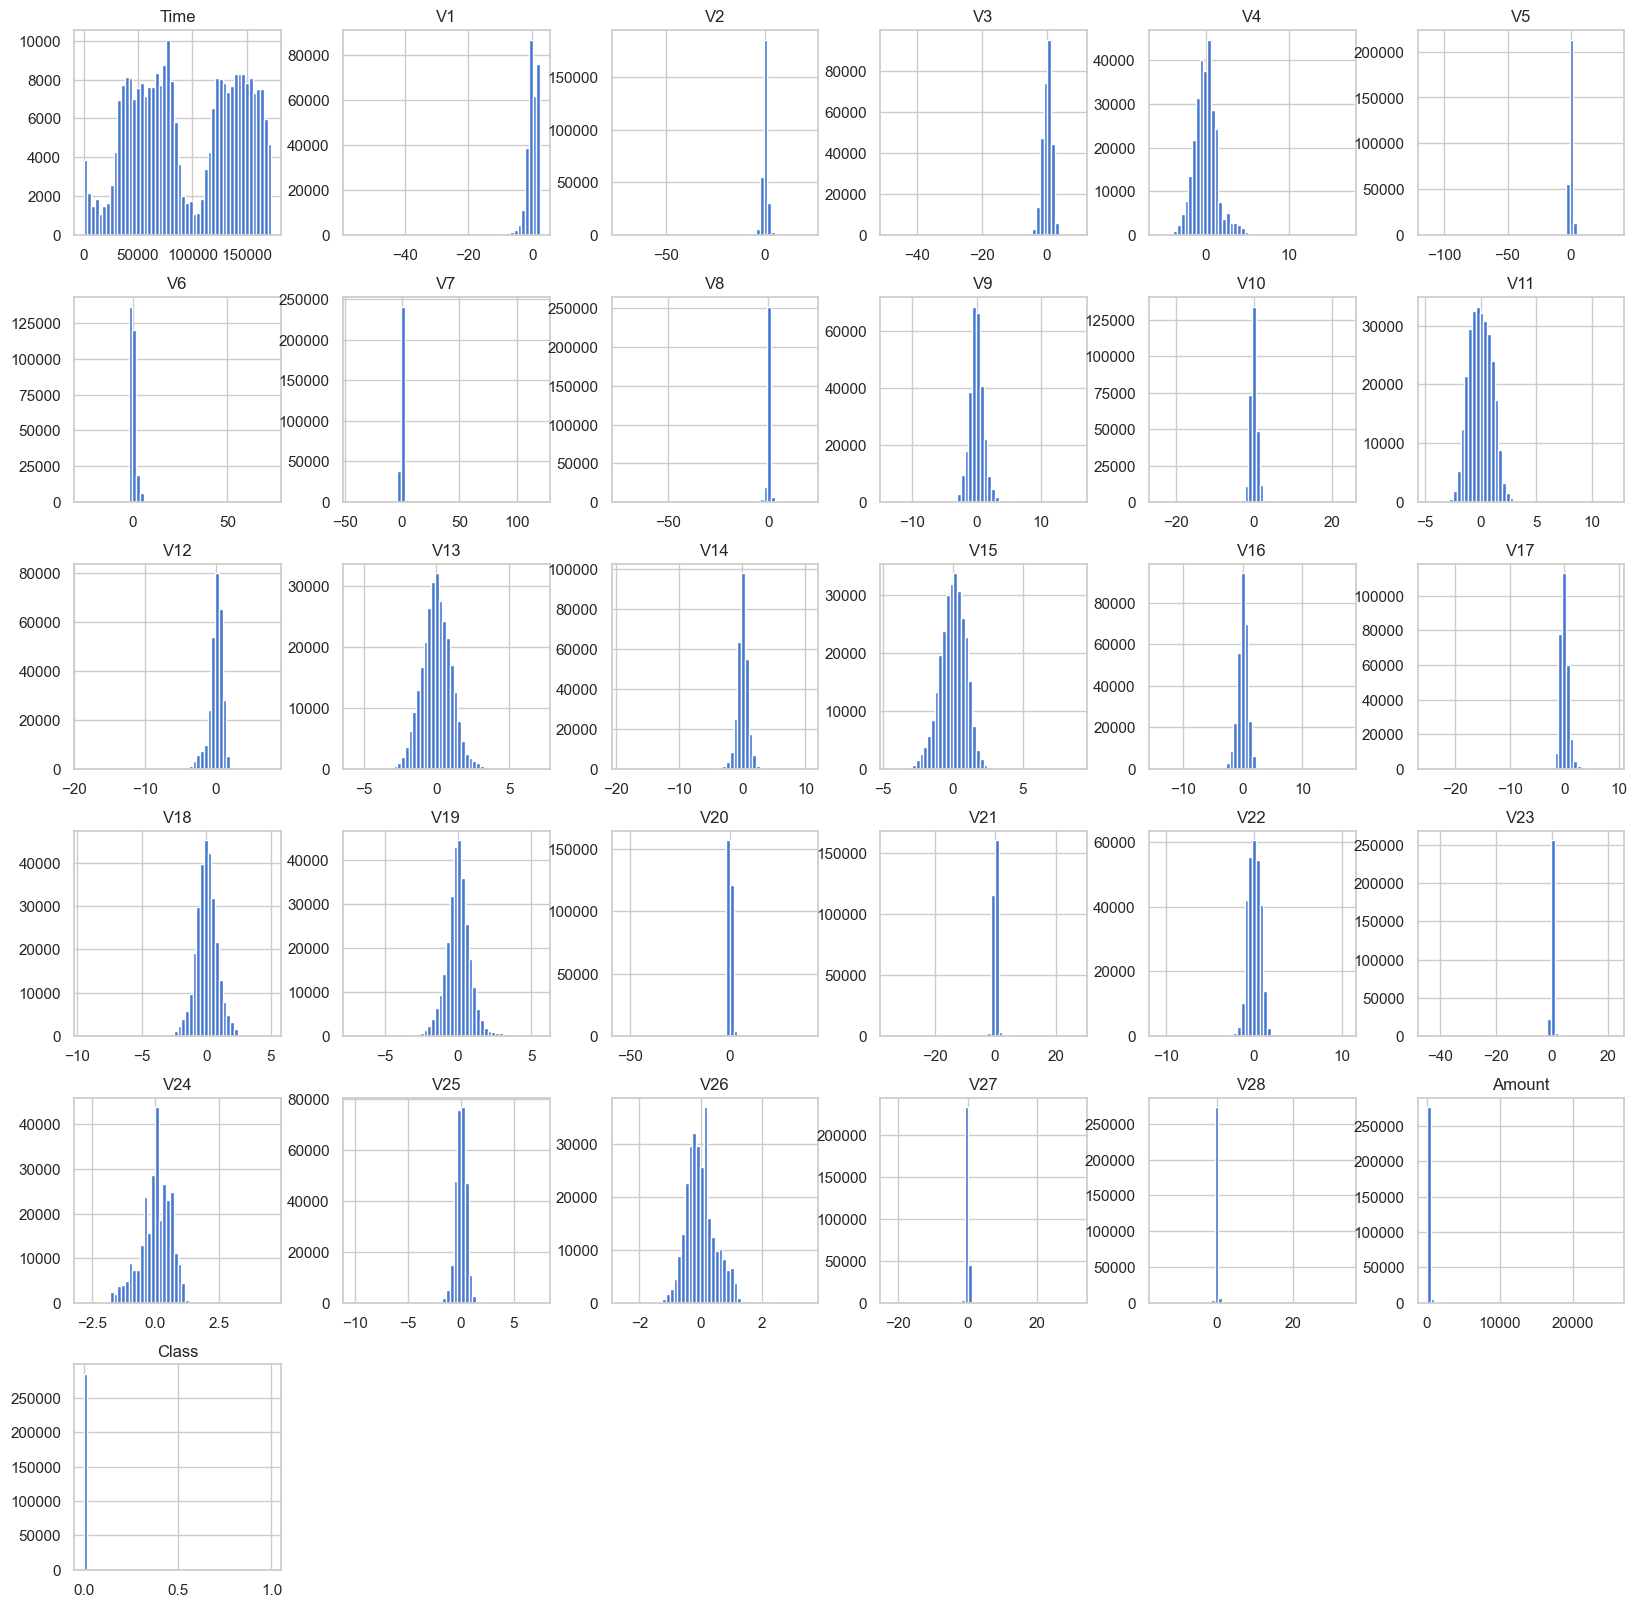

In [6]:
df.hist(figsize=(20, 20), bins=50)
plt.show()

In [7]:
df[['Time','Amount', 'Class']].describe()
# no use looking at V features since we don't know what they mean

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


The only interesting thing here is that amount has standard deviation of 250, which is kind of a lot, let's look at the boxplot and possibly remove some outliers.

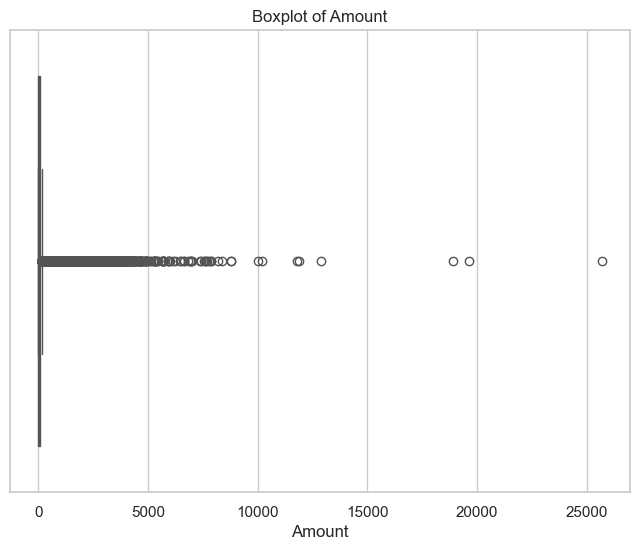

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Amount")
plt.show()

As I tought I noticed earlier, amount has some outlires, we don't want those messing with our model so we will just get rid of them.

In [9]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]
df_cleaned[['Amount']].describe()

,Amount
count,252903.000000
mean,34.974887
std,42.172250
min,0.000000
25%,4.490000
50%,16.000000
75%,49.990000
max,184.500000


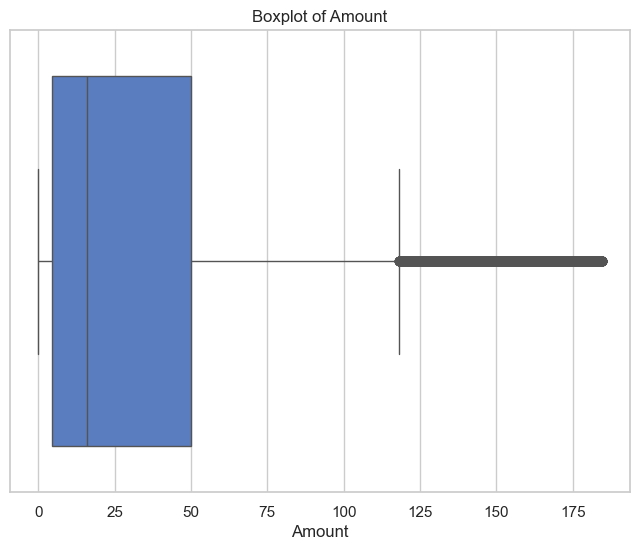

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['Amount'])
plt.title("Boxplot of Amount")
plt.show()

That looks a lot better, while we still have some outliers there are a lot of them in a limited range so let's just leave them be.  
We did lose some 30000 datapoints so let's just make sure we still have some fraud datapoints.

In [11]:
df_cleaned['Class'].value_counts()

Class
0    252502
1       401
Name: count, dtype: int64

In [12]:
df_cleaned[['Time','Amount', 'Class']].describe()

,Time,Amount,Class
count,252903.000000,252903.000000,252903.000000
mean,94986.492228,34.974887,0.001586
std,47594.978003,42.172250,0.039788
min,0.000000,0.000000,0.000000
25%,54533.500000,4.490000,0.000000
50%,85041.000000,16.000000,0.000000
75%,139586.000000,49.990000,0.000000
max,172788.000000,184.500000,1.000000


## Feature Scaling & Data Splitting

Let's now split the data and then we can scale the time and amount features.

In [13]:
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Applying RobustScaler to Amount (handles outliers better)
amount_scaler = RobustScaler()
X_train['Amount'] = amount_scaler.fit_transform(X_train[['Amount']])
X_val['Amount'] = amount_scaler.transform(X_val[['Amount']])
X_test['Amount'] = amount_scaler.transform(X_test[['Amount']])

# Applying MinMaxScaler to Time (as it incrementally increases)
time_scaler = MinMaxScaler()
X_train['Time'] = time_scaler.fit_transform(X_train[['Time']])
X_val['Time'] = time_scaler.transform(X_val[['Time']])
X_test['Time'] = time_scaler.transform(X_test[['Time']])

In [14]:
y_train.value_counts(), y_val.value_counts(), y_test.value_counts()

(Class
 0    176751
 1       281
 Name: count, dtype: int64,
 Class
 0    37875
 1       60
 Name: count, dtype: int64,
 Class
 0    37876
 1       60
 Name: count, dtype: int64)

Just making sure we have the same count of fraudulent activity in both validation and test datasets.

In [148]:
X_train[['Time','Amount']].describe()

,Time,Amount
count,177032.000000,177032.000000
mean,0.550152,0.418303
std,0.275313,0.928618
min,0.000000,-0.351791
25%,0.315789,-0.253131
50%,0.492780,0.000000
75%,0.808084,0.746869
max,1.000000,3.702263


Okay so now everything is nicely scaled we can begin with the actual training.

## Model Selection (Training & Evaluation)

 - Accuracy: calculates the accuracy score.
 - ROC AUC Score: useful for binary classification tasks to measure the model's ability to distinguish between classes.
 - Classification Report: includes precision, recall, F1-score, and support for each class.
 - Confusion Matrix: this matrix shows the counts of true positive, true negative, false positive, and false negative predictions.

In [22]:
def evaluate_model(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Classification Report
    class_report = classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud'])
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Classification Report:")
    print(class_report)
    
    # Confusion Matrix Plot
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.show()

In [150]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Model: LogisticRegression
Accuracy: 0.9993
ROC AUC Score: 0.9885
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     37875
       Fraud       0.83      0.72      0.77        60

    accuracy                           1.00     37935
   macro avg       0.91      0.86      0.88     37935
weighted avg       1.00      1.00      1.00     37935



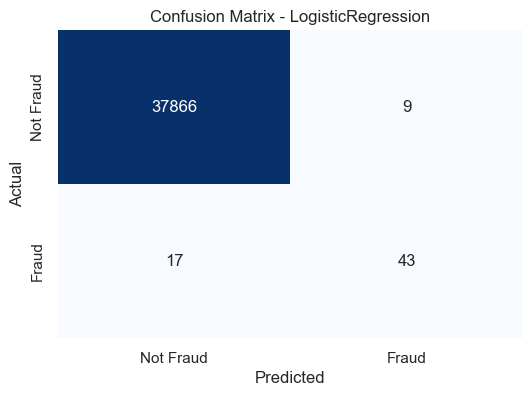

In [151]:
evaluate_model(logreg, X_val, y_val)

We achieved nearly 100% accuracy. However, this high accuracy is misleading because the model struggles to correctly identify fraudulent transactions. The reason for this is that normal transactions are much more common, skewing the accuracy towards a perfect score.

The model performs exceptionally well in predicting normal (non-fraudulent) transactions but falls short when it comes to detecting fraud. Machine learning models generally improve with more data, and since we have an abundance of normal transaction data, the model becomes biased towards predicting normal transactions. This bias results in lower detection rates for fraudulent transactions, despite the high overall accuracy.

So for Fraud:
 - `precision` how good is our model at not signaling when people are making legitamate transactions
 - `recall` how good is our model at signaling when an activity is fradulant

We have precision of 0.83 that means that 83 out of 100 people doing a normal transaction will not get blocked, this determines our user frustration levels. And for recall we got 0.72 that means that 72 out of 100 credit card thiefs will get caught and their transactions blocked.

\* We can look at F1 score as a combination of precision and accuracy, so as it get's closer to 1.0 our model gets better.

In [72]:
shallow_nn = Sequential()
shallow_nn.add(InputLayer((X_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

checkpoint = ModelCheckpoint('shallow_nn.keras', save_best_only=True)
shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
shallow_nn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 2)                   │              62 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 4 (16.00 B)

In [74]:
shallow_nn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, callbacks=checkpoint)

Epoch 1/3
5533/5533 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - accuracy: 0.9569 - loss: 0.1955 - val_accuracy: 0.9994 - val_loss: 0.0118
Epoch 2/3
5533/5533 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9994 - val_loss: 0.0127
Epoch 3/3
5533/5533 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 0.9994 - val_loss: 0.0115


In [62]:
def nn_predictions(model, x):
    return (model.predict(x).flatten() > 0.5).astype(int)

In [63]:
shallow_nn_pred = nn_predictions(shallow_nn, X_val)

1421/1421 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


In [65]:
print(classification_report(y_val, shallow_nn_pred, target_names=['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00     37875
       Fraud       0.99      0.96      0.98      7575

    accuracy                           0.99     45450
   macro avg       0.99      0.98      0.99     45450
weighted avg       0.99      0.99      0.99     45450



Okay so let's put our scores in a value so we can compare.

| Model        | Precision | Recall | F1-score |
|--------------|-----------|--------|----------|
| logreg       | 0.83      | 0.72   | 0.77     |
| shallow_nn   | 0.75      | 0.90   | 0.82     |
  
Shallow NN has slightly lower precision, but a much better recall and overall a larger F1 score.  
If we went by F1-score, a more balanced aproach, shallow NN is the best choice. But if we prefer precison overall we would pick Logistic Regression.  
Let's try out some other models!

In [64]:
dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Model: DecisionTreeClassifier
Accuracy: 0.9993
ROC AUC Score: 0.9165
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     37875
       Fraud       0.77      0.83      0.80        60

    accuracy                           1.00     37935
   macro avg       0.88      0.92      0.90     37935
weighted avg       1.00      1.00      1.00     37935



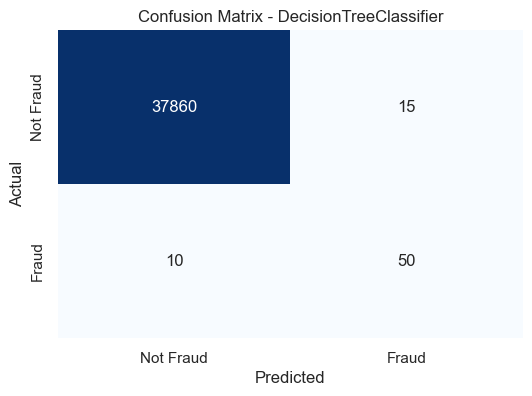

In [66]:
evaluate_model(dtree, X_val, y_val)

Scoreboard:
| Model        | Precision | Recall | F1-score |
|--------------|-----------|--------|----------|
| logreg       | 0.83      | 0.72   | 0.77     |
| shallow_nn   | 0.79      | 0.90   | 0.84     |
| dectree      | 0.77      | 0.83   | 0.80     |

Okay, as expected the Decision Tree did a bit worse than Shallow NN. Let's try models that involve multiple decision trees!

In [33]:
# n_jobs param specifies the number of CPU cores to use in parallel processing
# here we set n_jobs=-1 meaning use all avaiable CPU cores, this way it is much faster
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

Model: RandomForestClassifier
Accuracy: 0.9996
ROC AUC Score: 0.9745
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     37875
       Fraud       0.91      0.85      0.88        60

    accuracy                           1.00     37935
   macro avg       0.96      0.92      0.94     37935
weighted avg       1.00      1.00      1.00     37935



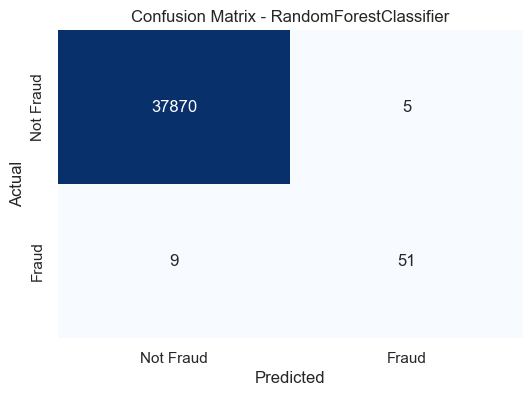

In [34]:
evaluate_model(rf, X_val, y_val)

Scoreboard:
| Model        | Precision | Recall | F1-score |
|--------------|-----------|--------|----------|
| logreg       | 0.83      | 0.72   | 0.77     |
| dectree      | 0.77      | 0.83   | 0.80     |
| shallow_nn   | 0.79      | 0.90   | 0.84     |
| randforest   | 0.91      | 0.85   | 0.88     |


Ok, so Random Forest did the best overall, but it does have worse recall than Shallow NN. Meaning more thiefs would get away.  
  
\* I have changed the model order a bit, so we have them ranked worse-to-best by F1-score.

In [58]:
gbc = GradientBoostingClassifier(n_estimators=50, random_state=42, verbose=2)

gbc.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.0270            7.91m
         2           0.0409            7.54m
         3 19719197262963397525543845888.0000            7.20m
         4 19719197262963397525543845888.0000            6.97m
         5 19719197262963397525543845888.0000            6.76m
         6 19719197262963397525543845888.0000            6.67m
         7 19719197262963397525543845888.0000            6.55m
         8 19719197262963397525543845888.0000            6.40m
         9 19719197262963397525543845888.0000            6.29m
        10 44742473301728555041833353216.0000            6.12m
        11 44742473301728555041833353216.0000            5.99m
        12 44742473301728555041833353216.0000            5.82m
        13 44742473301728555041833353216.0000            5.65m
        14 44742473301728555041833353216.0000            5.49m
        15 44742473301728555041833353216.0000            5.35m
        16 44742473301728555041833353216.0000

GradientBoostingClassifier(n_estimators=50, random_state=42, verbose=2)

Model: GradientBoostingClassifier
Accuracy: 0.9993
ROC AUC Score: 0.7814
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     37875
       Fraud       0.85      0.67      0.75        60

    accuracy                           1.00     37935
   macro avg       0.93      0.83      0.87     37935
weighted avg       1.00      1.00      1.00     37935



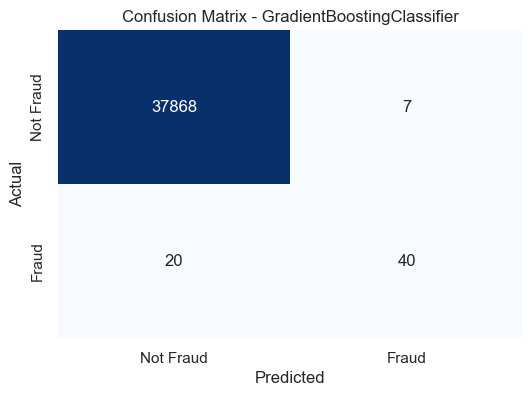

In [60]:
evaluate_model(gbc, X_val, y_val)

Scoreboard:
| Model        | Precision | Recall | F1-score |
|--------------|-----------|--------|----------|
| gradboost    | 0.85      | 0.67   | 0.75     |
| logreg       | 0.83      | 0.72   | 0.77     |
| dectree      | 0.77      | 0.83   | 0.80     |
| shallow_nn   | 0.79      | 0.90   | 0.84     |
| randforest   | 0.91      | 0.85   | 0.88     |


Gradient Boosting did the worse so far, maybe if we were to lower the max_depth it would do a bit better?

In [62]:
gbc2 = GradientBoostingClassifier(n_estimators=50, random_state=42, max_depth=1, verbose=2)

gbc2.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.0376            2.50m
         2           0.0375            2.51m
         3           0.0374            2.43m
         4           0.0373            2.36m
         5           0.0372            2.35m
         6           0.0372            2.32m
         7           0.0371            2.28m
         8           0.0370            2.22m
         9           0.0370            2.15m
        10           0.0370            2.08m
        11           0.0369            2.01m
        12           0.0369            1.94m
        13           0.0369            1.88m
        14           0.0368            1.82m
        15           0.0368            1.76m
        16           0.0368            1.71m
        17           0.0368            1.65m
        18           0.0368            1.61m
        19           0.0368            1.56m
        20           0.0368            1.51m
        21           0.0368            1.46m
        2

GradientBoostingClassifier(max_depth=1, n_estimators=50, random_state=42,
                           verbose=2)

Model: GradientBoostingClassifier
Accuracy: 0.9992
ROC AUC Score: 0.8997
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     37875
       Fraud       0.71      0.80      0.75        60

    accuracy                           1.00     37935
   macro avg       0.85      0.90      0.87     37935
weighted avg       1.00      1.00      1.00     37935



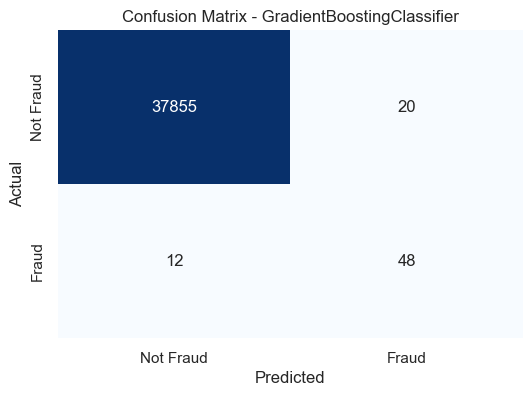

In [63]:
evaluate_model(gbc2, X_val, y_val)

Scoreboard:
| Model        | Precision | Recall | F1-score |
|--------------|-----------|--------|----------|
| gradboost    | 0.85      | 0.67   | 0.75     |
| gradboost_2  | 0.71      | 0.80   | 0.75     |
| logreg       | 0.83      | 0.72   | 0.77     |
| dectree      | 0.77      | 0.83   | 0.80     |
| shallow_nn   | 0.79      | 0.90   | 0.84     |
| randforest   | 0.91      | 0.85   | 0.88     |

So, precision got worse but recall got better, overall the score stayed the same, let's move on!  
\* The reason I used verbose=2 for Gradient Boost is because it takes a long time to train, and I wanted to be sure the kernel didn't get stuck, if the logs bother you just remove the `verbose` param.

In [37]:
svc = LinearSVC()

svc.fit(X_train, y_train)

LinearSVC()

In [38]:
print(classification_report(y_val, svc.predict(X_val), target_names=['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     37875
       Fraud       0.80      0.67      0.73        60

    accuracy                           1.00     37935
   macro avg       0.90      0.83      0.86     37935
weighted avg       1.00      1.00      1.00     37935



Scoreboard:

| Model        | Precision | Recall | F1-score |
|--------------|-----------|--------|----------|
| lin_svc      | 0.80      | 0.67   | 0.73     |
| gradboost    | 0.85      | 0.67   | 0.75     |
| gradboost_2  | 0.71      | 0.80   | 0.75     |
| logreg       | 0.83      | 0.72   | 0.77     |
| dectree      | 0.77      | 0.83   | 0.80     |
| shallow_nn   | 0.79      | 0.90   | 0.84     |
| randforest   | 0.91      | 0.85   | 0.88     |


So LinearSVC is the worse one yet, this is because, unlike some other models here(Random Forest, NN), it is super sensitive to class imbalance.

Random Forest seems to best our best overall option, unless we prefer recall in which case Shallow NN does the job.  

Okay so we tried out a bunch of different models, let's try one more thing though.  
We mentioned in the beginning how imbalanced our dataset is, and that it would cause the models to be biased towards normal transaction.  
Now, we are going to balance the dataset out by using Smote to generate fake fraud records, so we have the same amount of normal and fraudulent transactions!

### Balancing the dataset

We can balance the dataset in two ways:
 - exclude a bunch of normal transactions,
 - or add a bunch of fraud transactions,
  
so there are equal amount of normal and fraud transactions in the dataset.

In our case, the fraud cases really are too few. In this case oversampling seems like a better choice.  
Also, I think that making the dataset 50:50 would be a bit too unrealistic, and it might cause the model to overfit on fraud cases. So we will make it 80:20 (Normal:Fraud). 

For this we will use Smote, since it will also generate new fraud cases instead of just duplicating.

In [15]:
counter = Counter(y)
print("Before SMOTE:", counter)

n_normal = counter[0]
n_fraud_target = int(n_normal * 0.20)

smote = SMOTE(sampling_strategy={1: n_fraud_target}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

counter_resampled = Counter(y_resampled)
print("After SMOTE:", counter_resampled)

df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Class'] = y_resampled

Before SMOTE: Counter({0: 252502, 1: 401})
After SMOTE: Counter({0: 252502, 1: 50500})


In [16]:
df_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
3,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
4,2.000000,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.670000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302997,146264.170623,0.150266,2.808705,-6.231345,3.932236,-1.173904,-2.675022,-2.190021,0.806689,-2.125047,...,0.588102,-0.003335,0.133555,-0.035409,-0.015943,0.484858,0.275800,0.015472,71.605022,1
302998,41189.787284,-7.660801,5.648535,-10.897971,7.112109,-7.547976,-3.548522,-12.053709,5.072414,-6.215972,...,2.227417,0.003052,-0.147155,0.433727,-0.191786,0.473330,1.154841,0.174891,44.714581,1
302999,35815.583253,-2.667779,3.018164,-3.579381,3.361661,-2.318493,-1.571634,-4.341248,-0.152315,-2.209629,...,1.655692,-0.081009,-0.242594,0.066081,-0.067663,0.305983,0.445404,-0.137444,35.731931,1
303000,94362.904418,-21.363301,13.754849,-25.407505,8.516124,-15.606939,-1.520915,-26.748680,-7.947382,-7.883101,...,-6.367310,2.694196,1.260439,0.312154,-1.043483,-0.992120,-5.170332,-0.935553,1.000000,1


In [42]:
df_balanced['Class'].value_counts()

Class
0    252502
1     50500
Name: count, dtype: int64

In [18]:
X_train_b, X_temp_b, y_train_b, y_temp_b = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
X_val_b, X_test_b, y_val_b, y_test_b = train_test_split(X_temp_b, y_temp_b, test_size=0.5, random_state=42, stratify=y_temp_b)

amount_scaler = RobustScaler()
X_train_b['Amount'] = amount_scaler.fit_transform(X_train_b[['Amount']])
X_val_b['Amount'] = amount_scaler.transform(X_val_b[['Amount']])
X_test_b['Amount'] = amount_scaler.transform(X_test_b[['Amount']])

time_scaler = MinMaxScaler()
X_train_b['Time'] = time_scaler.fit_transform(X_train_b[['Time']])
X_val_b['Time'] = time_scaler.transform(X_val_b[['Time']])
X_test_b['Time'] = time_scaler.transform(X_test_b[['Time']])

In [19]:
y_train_b.value_counts(), y_val_b.value_counts(), y_test_b.value_counts()

(Class
 0    176751
 1     35350
 Name: count, dtype: int64,
 Class
 0    37875
 1     7575
 Name: count, dtype: int64,
 Class
 0    37876
 1     7575
 Name: count, dtype: int64)

In [20]:
logreg_b = LogisticRegression(max_iter=1000, random_state=42)

logreg_b.fit(X_train_b, y_train_b)

LogisticRegression(max_iter=1000, random_state=42)

Model: LogisticRegression
Accuracy: 0.9895
ROC AUC Score: 0.9974
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.99      1.00      0.99     37875
       Fraud       0.99      0.95      0.97      7575

    accuracy                           0.99     45450
   macro avg       0.99      0.97      0.98     45450
weighted avg       0.99      0.99      0.99     45450



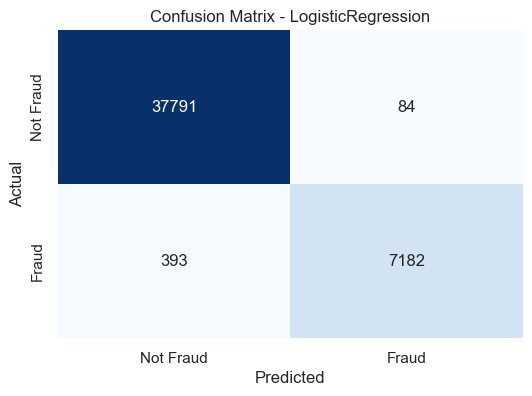

In [23]:
evaluate_model(logreg_b, X_val_b, y_val_b)

Woah, that is so much better already, let's try all the other models.

Scoreboard (BALANCED):

| Model        | Precision | Recall | F1-score |
|--------------|-----------|--------|----------|         
| logreg       | 0.99      | 0.95   | 0.97     |

In [167]:
shallow_nn_b = Sequential()
shallow_nn_b.add(InputLayer((X_train_b.shape[1],)))
shallow_nn_b.add(Dense(2, 'relu'))
shallow_nn_b.add(BatchNormalization())
shallow_nn_b.add(Dense(1, 'sigmoid'))

checkpoint_b = ModelCheckpoint('shallow_nn_b.keras', save_best_only=True)
shallow_nn_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [168]:
shallow_nn_b.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 2)                   │              62 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 4 (16.00 B)

In [169]:
shallow_nn_b.fit(X_train_b, y_train_b, validation_data=(X_val_b, y_val_b), epochs=3, callbacks=checkpoint_b)

Epoch 1/3
6629/6629 ━━━━━━━━━━━━━━━━━━━━ 45s 6ms/step - accuracy: 0.8386 - loss: 0.2939 - val_accuracy: 0.9926 - val_loss: 0.0288
Epoch 2/3
6629/6629 ━━━━━━━━━━━━━━━━━━━━ 42s 6ms/step - accuracy: 0.9911 - loss: 0.0326 - val_accuracy: 0.9921 - val_loss: 0.0270
Epoch 3/3
6629/6629 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.9921 - loss: 0.0294 - val_accuracy: 0.9926 - val_loss: 0.0256


In [170]:
shallow_nn_b_pred = nn_predictions(shallow_nn_b, X_val_b)

1421/1421 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


In [171]:
print(classification_report(y_val_b, shallow_nn_b_pred, target_names=['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00     37875
       Fraud       0.99      0.97      0.98      7575

    accuracy                           0.99     45450
   macro avg       0.99      0.98      0.99     45450
weighted avg       0.99      0.99      0.99     45450



Scoreboard (BALANCED):

| Model        | Precision | Recall | F1-score |
|--------------|-----------|--------|----------|         
| logreg       | 0.99      | 0.95   | 0.97     |
| shallow_nn   | 0.99      | 0.97   | 0.98     |

In [178]:
dtree_b = DecisionTreeClassifier(random_state=42)

dtree_b.fit(X_train_b, y_train_b)

DecisionTreeClassifier(random_state=42)

Model: DecisionTreeClassifier
Accuracy: 0.9975
ROC AUC Score: 0.9962
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     37875
       Fraud       0.99      0.99      0.99      7575

    accuracy                           1.00     45450
   macro avg       0.99      1.00      1.00     45450
weighted avg       1.00      1.00      1.00     45450



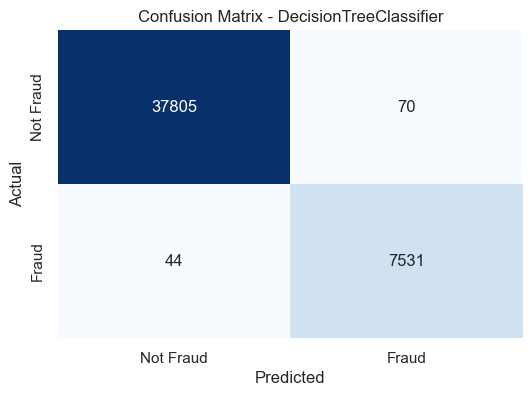

In [181]:
evaluate_model(dtree_b, X_val_b, y_val_b)

Scoreboard (BALANCED):

| Model        | Precision | Recall | F1-score |
|--------------|-----------|--------|----------|         
| logreg       | 0.99      | 0.95   | 0.97     |
| shallow_nn   | 0.99      | 0.96   | 0.97     |
| dectree      | 0.99      | 0.99   | 0.99     |

In [27]:
rf_b = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

rf_b.fit(X_train_b, y_train_b)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

Model: RandomForestClassifier
Accuracy: 0.9996
ROC AUC Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     37875
       Fraud       1.00      1.00      1.00      7575

    accuracy                           1.00     45450
   macro avg       1.00      1.00      1.00     45450
weighted avg       1.00      1.00      1.00     45450



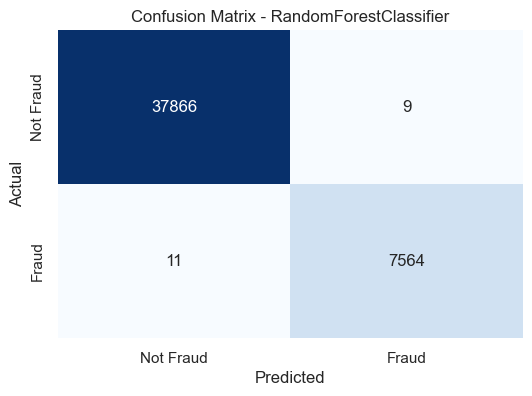

In [28]:
evaluate_model(rf_b, X_val_b, y_val_b)

Scoreboard (BALANCED):

| Model        | Precision | Recall | F1-score |
|--------------|-----------|--------|----------|         
| logreg       | 0.99      | 0.95   | 0.97     |
| shallow_nn   | 0.99      | 0.96   | 0.97     |
| dectree      | 0.99      | 0.99   | 0.99     |
| randforest   | 1.0       | 1.0    | 1.0      |

In [185]:
gbc_b = GradientBoostingClassifier(n_estimators=50, random_state=42, verbose=2)

gbc_b.fit(X_train_b, y_train_b)

      Iter       Train Loss   Remaining Time 
         1           0.7321            8.53m
         2           0.6290            8.38m
         3           0.5532            8.25m
         4           0.4935            8.08m
         5           0.4447            8.01m
         6           0.4038            7.95m
         7           0.3687            7.71m
         8           0.3387            7.45m
         9           0.3126            7.23m
        10           0.2892            7.02m
        11           0.2684            6.81m
        12           0.2506            6.63m
        13           0.2342            6.45m
        14           0.2194            6.23m
        15           0.2066            6.05m
        16           0.1948            5.85m
        17           0.1849            5.67m
        18           0.1757            5.48m
        19           0.1671            5.31m
        20           0.1588            5.12m
        21           0.1517            4.96m
        2

GradientBoostingClassifier(n_estimators=50, random_state=42, verbose=2)

Model: GradientBoostingClassifier
Accuracy: 0.9892
ROC AUC Score: 0.9975
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.99      1.00      0.99     37875
       Fraud       0.99      0.95      0.97      7575

    accuracy                           0.99     45450
   macro avg       0.99      0.97      0.98     45450
weighted avg       0.99      0.99      0.99     45450



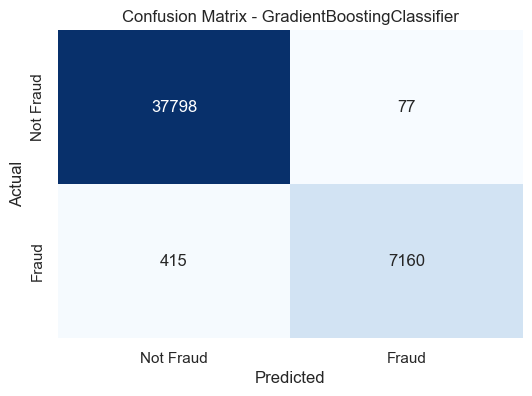

In [187]:
evaluate_model(gbc_b, X_val_b, y_val_b)

Scoreboard (BALANCED):

| Model        | Precision | Recall | F1-score |
|--------------|-----------|--------|----------|         
| logreg       | 0.99      | 0.95   | 0.97     |
| gradboost    | 0.99      | 0.95   | 0.97     |
| shallow_nn   | 0.99      | 0.96   | 0.97     |
| dectree      | 0.99      | 0.99   | 0.99     |
| randforest   | 1.0       | 1.0    | 1.0      |


In [24]:
svc_b = LinearSVC()

svc_b.fit(X_train_b, y_train_b)

LinearSVC()

In [26]:
print(classification_report(y_val_b, svc_b.predict(X_val_b), target_names=['Normal', 'Fraud']))

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99     37875
       Fraud       0.99      0.93      0.96      7575

    accuracy                           0.99     45450
   macro avg       0.99      0.97      0.98     45450
weighted avg       0.99      0.99      0.99     45450



Scoreboard (BALANCED):

| Model        | Precision | Recall | F1-score |
|--------------|-----------|--------|----------|
| lin_svc      | 0.99      | 0.93   | 0.96     |
| logreg       | 0.99      | 0.95   | 0.97     |
| gradboost    | 0.99      | 0.95   | 0.97     |
| shallow_nn   | 0.99      | 0.96   | 0.97     |
| dectree      | 0.99      | 0.99   | 0.99     |
| randforest   | 1.0       | 1.0    | 1.0      |


Ok, so all our models did really well, maybe even too well, like they are overfitting!  
Let's check to make sure. We will se what accuracy it gets on train, val and test data.  
Since Random Forest is our best model, we will just work with it.

In [29]:
y_train_pred_b = rf_b.predict(X_train_b)
train_accuracy = accuracy_score(y_train_b, y_train_pred_b)
print(f'Training Accuracy: {train_accuracy:.4f}')

Training Accuracy: 1.0000


In [30]:
y_val_pred_b = rf_b.predict(X_val_b)
val_accuracy = accuracy_score(y_val_b, y_val_pred_b)
print(f'Val Accuracy: {val_accuracy:.4f}')

Val Accuracy: 0.9996


In [31]:
y_test_pred_b = rf_b.predict(X_test_b)
test_accuracy = accuracy_score(y_test_b, y_test_pred_b)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9992


Hmm, it does seem to be overfitting a bit, let's try to evaluate the model on the balanced test set now.

Model: RandomForestClassifier
Accuracy: 0.9992
ROC AUC Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     37876
       Fraud       1.00      1.00      1.00      7575

    accuracy                           1.00     45451
   macro avg       1.00      1.00      1.00     45451
weighted avg       1.00      1.00      1.00     45451



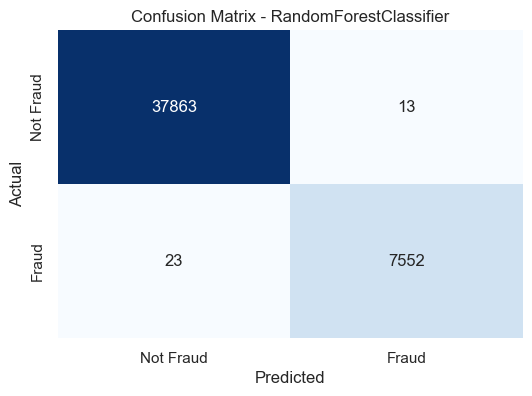

In [32]:
evaluate_model(rf_b, X_test_b, y_test_b)

It does get most of it right though. Now the real test set!

Model: RandomForestClassifier
Accuracy: 0.9998
ROC AUC Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     37876
       Fraud       0.90      1.00      0.94        60

    accuracy                           1.00     37936
   macro avg       0.95      1.00      0.97     37936
weighted avg       1.00      1.00      1.00     37936



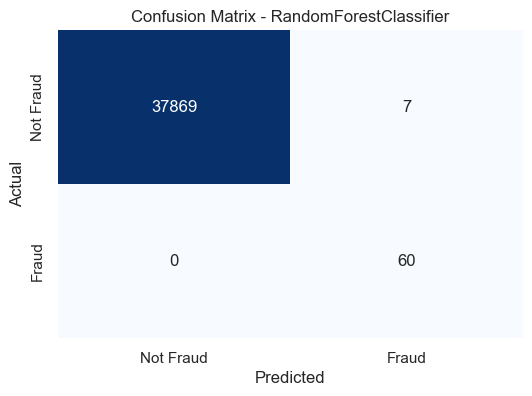

In [35]:
evaluate_model(rf_b, X_test, y_test)

That is really good! It didn't let a single fraud transaction slide.   
Let's just see how our model trained on the actual dataset did on the actual test set.

Model: RandomForestClassifier
Accuracy: 0.9998
ROC AUC Score: 0.9578
Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     37876
       Fraud       1.00      0.87      0.93        60

    accuracy                           1.00     37936
   macro avg       1.00      0.93      0.96     37936
weighted avg       1.00      1.00      1.00     37936



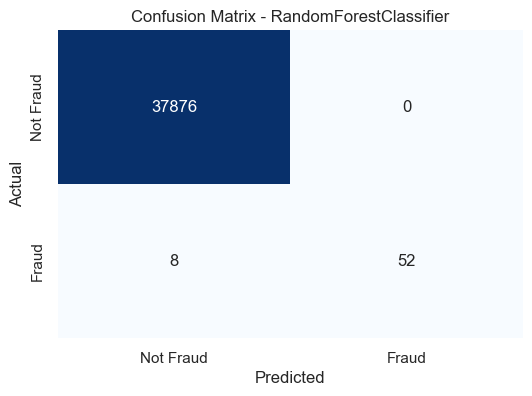

In [36]:
evaluate_model(rf, X_test, y_test)

Pretty good as well, it had perfect precision, but let a couple of fraud transactions go unnoticed.

## Conclusion

In this project, we built a machine learning model to detect fraudulent credit card transactions.  
We trained and evaluated a couple of models, the ones that did the best are Random Forest and Shallow NN. While some models struggeled because of the heavily imbalanced dataset (Gradient Boost, LinearSVC), all of them did really well on the balanced one.  
Since we found a great solution, we only checked out Random Forest on the balanced and the actual test set, so a next step could be to check how the other models did. As well as trying some other models like XGBoost or LightGBM.   
You could also try to optimize hyperparameters of used models with techniques like Grid/Random Search.